<a href="https://colab.research.google.com/github/ANGELA-NYUTU/KNN-NAIVE-BAYES/blob/main/Moringa_Data_Science_Core_WEEK_9_Independent_Project_2021_10_Angela_Nyutu_Python_Notebook_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING SURVIVAL IN THE TITANIC ACCIDENT**

## **Objective:**
To identify feartures that led to the likely survival of victims 

## **Context**
The dataset provides details and names of people, given the passenger class they boarded, number of family members on board, embarkement station,sex, age and fare.

## **Metric for Success**

To identify survival rate given the nature of boarding and personal characteristics.
To identify a model that accurately predicts the likelyhood of survival given the features

## **Experimental Design**

Several experimental designs will be used i.e.:

a.Exploratory data analysis
b.K Nearest Neighbours(KNN)



## **Dataset Loading and Preview**

### **Importing Libraries**

In [543]:
#Reading libraries
import pandas as pd
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot


#Modeling libraries
from sklearn.neighbors import KNeighborsClassifier

#Splitting libraries
from sklearn.model_selection import train_test_split

#Optimization libraries
from sklearn.model_selection import GridSearchCV

#Metrics libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import cross_val_score


### **Loading the Dataset**

**1. Training Dataset**

In [544]:
dftrain=pd.read_csv('/content/train (5).csv')

**Dataset Preview**

Top of the dataframe

In [545]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Bottom of the Dataframe

In [546]:
dftrain.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Size

In [547]:
print('The training dataset has',dftrain.columns.shape,'columns and',dftrain.index.shape,'rows')

The training dataset has (12,) columns and (891,) rows


Data Types

In [548]:
dftrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Columns

In [549]:
dftrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**2. Test dataset**

**Dataset Preview**

In [550]:
dftest=pd.read_csv('/content/test (1).csv')

Top of the dataframe

In [551]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Bottom of the Dataframe

In [552]:
dftest.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Size

In [553]:
print('The test dataset has',dftest.columns.shape,'columns and',dftest.index.shape,'rows')

The test dataset has (11,) columns and (418,) rows


Data Types

In [554]:
dftest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Columns

In [555]:
dftest.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## **Dataset Cleaning**

**Missing Values**

In [556]:
def missing_vals(df):
  df1=df.isnull().sum()
  return df1

In [557]:
missing_vals(dftrain)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [558]:
missing_vals(dftest)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Dealing with missing values**

In [559]:
#The cabin column has over 50% missing values therefore this column will be dropped from both training and testing sets
def drop(df):
  df2=df.drop('Cabin',axis=1, inplace= True)
  return df2

In [560]:
drop(dftrain)

In [561]:
drop(dftest)

In [562]:
print(dftrain.shape)
print(dftest.shape)

(891, 11)
(418, 10)


In [563]:
#Filling age missing values using the average age 
dftrain['Age'].fillna(dftrain['Age'].mean(),inplace=True)
dftest['Age'].fillna(dftest['Age'].mean(),inplace=True)
dftest['Fare'].fillna(dftest['Fare'].mean(),inplace=True)
#Dropping null values from the training dataset in the Embaked column
dftrain['Embarked'].fillna('S',inplace=True)


In [564]:
print(missing_vals(dftrain))
print(missing_vals(dftest))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Duplicated Values**

In [565]:
def duplicates(df):
  dup=df.duplicated().sum()
  if dup >0:
    df.drop_duplicates()
    dup1=df.duplicated().sum()
    return dup1

In [566]:
duplicates(dftrain)

0

In [567]:
duplicates(dftest)

0

**Modifying columns names**

In [568]:
def tidy_columns(df):
  tidy= df.columns=df.columns.str.strip().str.title()
  return tidy

In [569]:
tidy_columns(dftrain)

Index(['Passengerid', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [570]:
tidy_columns(dftest)

Index(['Passengerid', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**Dropping unnecessary columns**

In [571]:
def drop_unnecessary(df):
  drop= df.drop(['Name','Ticket','Passengerid'],axis=1,inplace=True)
  return drop

In [572]:
drop_unnecessary(dftrain)

In [573]:
drop_unnecessary(dftest)

**Outliers**

In [574]:
def outliers(df):
  out=df.boxplot(figsize=(10,8))
  return out

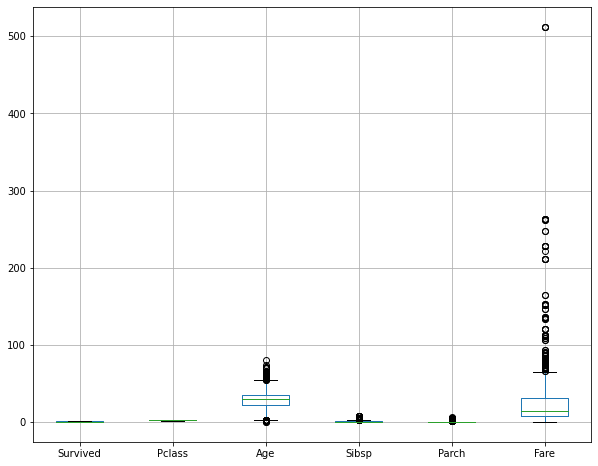

In [575]:
outliers(dftrain)

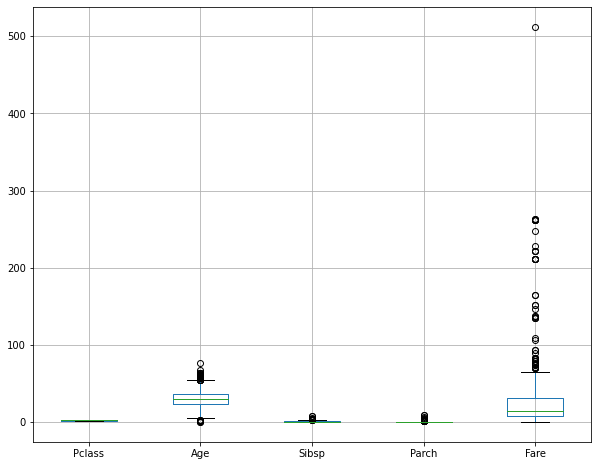

In [576]:
outliers(dftest)

**Summary:** outliers for this data will not be droppped given the columns such as no. of sibling on board and there is no limit to how many one can have for it to be considered abnormal. Also, given the size of the datasets, there will be a massive loss of data which would result in very small datasets which are not ideal for training.

**Preview the clean datasets**

In [577]:
#Training dataset preview
dftrain.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [578]:
dftest.head()

,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


##**Exploratory Data Analysis**

### **Univariate Analysis**

In [579]:
def describe(df):
  des=df[['Age','Fare']].describe()
  return des

In [580]:
describe(dftrain)

,Age,Fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [581]:
dftrain['Embarked'].mode()

0    S
dtype: object

In [582]:
#Checking the age distribution
def distribution(df,column):
  out=qqplot(df[column],line='s')
  plt.show()
  return out, plt.show

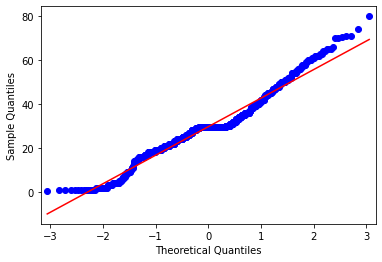

(<Figure size 432x288 with 1 Axes>, <function matplotlib.pyplot.show>)

In [583]:
distribution(dftrain,'Age')
#Age is normally distributed

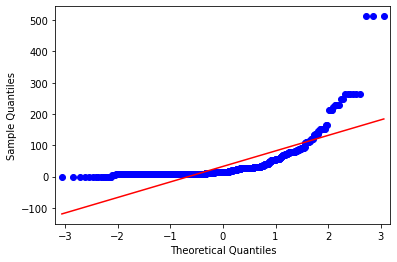

(<Figure size 432x288 with 1 Axes>, <function matplotlib.pyplot.show>)

In [584]:
distribution(dftrain,'Fare')

In [585]:
def pie(df,column):
  out=df[column].value_counts()
  plt.figure(figsize=(7,6))
  pie=plt.pie(out, labels=(df[column].unique()), autopct='%.1f%%',startangle = 90)
  plt.axis('equal')
  plt.title=(f'{column}'" DISTRIBUTION")
  plt.legend(title = f'{column}')
  plt.show()
  return pie,plt.show()

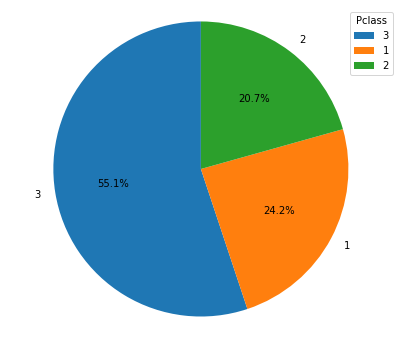

(([<matplotlib.patches.Wedge at 0x7fd2408bf7d0>,
  [Text(-1.0858746836637898, -0.1757161670935961, '3'),
   Text(0.9714243951954356, -0.5160762002061154, '1'),
   Text(0.6646263698677192, 0.8765111456658483, '2')],
  [Text(-0.5922952819984307, -0.09584518205105241, '55.1%'),
   Text(0.5298678519247829, -0.2814961092033356, '24.2%'),
   Text(0.3625234744733013, 0.4780969885450081, '20.7%')]),
 None)

In [586]:
pie(dftrain,'Pclass')

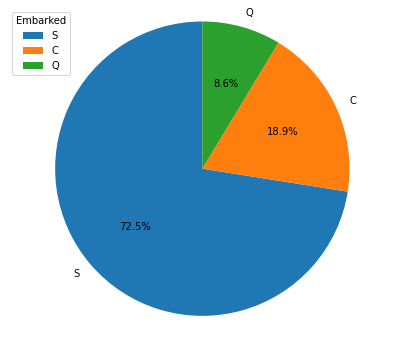

(([<matplotlib.patches.Wedge at 0x7fd2408252d0>,
  [Text(-0.8363836322972251, -0.7144665279950492, 'S'),
   Text(0.9973480237693374, 0.46400099082156865, 'C'),
   Text(0.29499002500580684, 1.059707924452334, 'Q')],
  [Text(-0.45620925398030454, -0.3897090152700268, '72.5%'),
   Text(0.544008012965093, 0.25309144953903745, '18.9%'),
   Text(0.16090365000316734, 0.5780225042467276, '8.6%')]),
 None)

In [587]:
pie(dftrain,'Embarked')

In [588]:
dftrain.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### **Bivariate Analysis**

In [589]:
def visual(df,column1,column2):
  data=df.groupby([column1,column2])[column2].count()
  out=data.unstack().plot(kind='bar',stacked= True)
  plt.yaxis=("No of People who ",f'{column2}')
  title=("No of People who ",f'{column2}',"per",f'{column1}')
  plt.show()
  return out, plt.show()

In [590]:
dftrain1=np.where(dftrain['Survived']==0,'No','Yes')
dftrain['Survived']=dftrain1

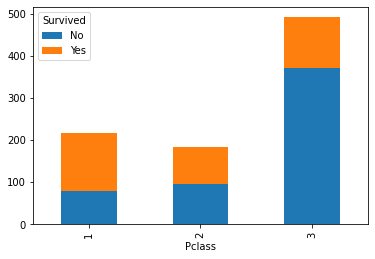

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2407e9810>, None)

In [591]:
visual(dftrain,'Pclass','Survived')

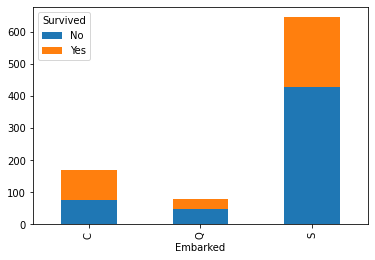

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd24075bf10>, None)

In [592]:
visual(dftrain,'Embarked','Survived')

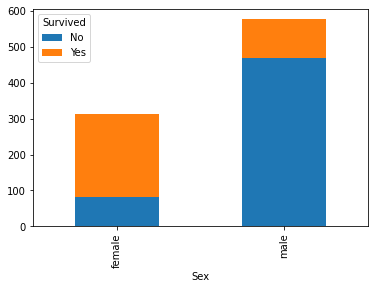

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2406dc290>, None)

In [593]:
visual(dftrain,'Sex','Survived')

### **Multivariate Analysis**

In [594]:
dftrain.corr()

,Pclass,Age,Sibsp,Parch,Fare
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566
Sibsp,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000


## **K Nearest Neighbours(KNN) Modeling and Predictions**

### **Data Preparation**

**Encoding data**

In [595]:
dftrain.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
0,No,3,male,22.0,1,0,7.2500,S
1,Yes,1,female,38.0,1,0,71.2833,C
2,Yes,3,female,26.0,0,0,7.9250,S
3,Yes,1,female,35.0,1,0,53.1000,S
4,No,3,male,35.0,0,0,8.0500,S


In [596]:
col=['Survived', 'Sex', 'Embarked']
for i in dftrain[col]:
  dftrain[i]=dftrain[i].astype('category')
  dftrain[i]=dftrain[i].cat.codes

In [597]:
dftrain.head(3)

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [598]:
col=['Sex', 'Embarked']
for i in dftest[col]:
  dftest[i]=dftest[i].astype('category')
  dftest[i]=dftest[i].cat.codes

In [599]:
dftest.head(3)

,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1


**Defining the variables**

In [632]:
x1=dftrain.iloc[:,1:]
x=dftrain.iloc[:,1:].values
y=dftrain.iloc[:,:1].values
x2=dftest.iloc[:,:].values


**Checking for multicollinearity**

In [601]:
#Checking for multicollinearity using Variance Inflation Factor
corr=x1.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)
#The results show VIF scores below 5 which means not independent factor heavily rely on each other

,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
Pclass,1.671580,-0.135889,0.426711,-0.146891,-0.119759,0.897665,-0.028323
Sex,-0.135889,1.108869,-0.100335,0.011318,0.242857,0.060458,-0.097557
Age,0.426711,-0.100335,1.205639,0.188049,0.096487,0.047710,-0.032006
Sibsp,-0.146891,0.011318,0.188049,1.282325,-0.440112,-0.226385,-0.093235
Parch,-0.119759,0.242857,0.096487,-0.440112,1.322550,-0.265520,-0.086573
Fare,0.897665,0.060458,0.047710,-0.226385,-0.265520,1.648696,0.245729
Embarked,-0.028323,-0.097557,-0.032006,-0.093235,-0.086573,0.245729,1.079324


**Splitting data**

In [637]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.3, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.4, random_state=42)

**Standardizing the data**

In [638]:
def scale(var1,var2):
  sc = StandardScaler()
  var1 = sc.fit_transform(var1)
  var2 = sc.transform(var2)
  return var1,var2

In [640]:
scale(x_train,x_test)
scale(x1_train,x1_test)
scale(x2_train,x2_test)
scale(x,x2)

(array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.47367361,
         -0.50244517,  0.58595414],
        [-1.56610693, -1.35557354,  0.63878901, ..., -0.47367361,
          0.78684529, -1.9423032 ],
        [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.47367361,
         -0.48885426,  0.58595414],
        ...,
        [ 0.82737724, -1.35557354,  0.        , ...,  2.00893337,
         -0.17626324,  0.58595414],
        [-1.56610693,  0.73769513, -0.2846632 , ..., -0.47367361,
         -0.04438104, -1.9423032 ],
        [ 0.82737724,  0.73769513,  0.17706291, ..., -0.47367361,
         -0.49237783, -0.67817453]]),
 array([[ 0.82737724,  0.73769513,  0.36944878, ..., -0.47367361,
         -0.49078316, -0.67817453],
        [ 0.82737724, -1.35557354,  1.33137817, ..., -0.47367361,
         -0.50747884,  0.58595414],
        [-0.36936484,  0.73769513,  2.48569343, ..., -0.47367361,
         -0.45336687, -0.67817453],
        ...,
        [ 0.82737724,  0.73769513,  0.67726619, ..., -

### **KNN- Baseline**
Before optimization

Model 1:80-20 split

In [651]:
knn=KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x_train,y_train)
ypred=model.predict(x_test)
print('Accuracy:',round(metrics.accuracy_score(y_test,ypred)*100),'%')
print('matrix:',metrics.confusion_matrix(y_test,ypred))
print(metrics.classification_report(y_test, ypred))
print(metrics.log_loss([0,1],[[85,20],[32,42]]))

Accuracy: 71 %
matrix: [[85 20]
 [32 42]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.57      0.62        74

    accuracy                           0.71       179
   macro avg       0.70      0.69      0.69       179
weighted avg       0.71      0.71      0.70       179

0.6931471805599453


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Model 2:70-30 split

In [647]:
knn=KNeighborsClassifier(n_neighbors=5)
model1=knn.fit(x1_train,y1_train)
ypred1=model1.predict(x1_test)
print('Accuracy:',round(metrics.accuracy_score(y1_test,ypred1)*100),'%')
print('matrix:',metrics.confusion_matrix(y1_test,ypred1))
print(metrics.classification_report(y1_test, ypred1))

Accuracy: 71 %
matrix: [[130  27]
 [ 52  59]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       157
           1       0.69      0.53      0.60       111

    accuracy                           0.71       268
   macro avg       0.70      0.68      0.68       268
weighted avg       0.70      0.71      0.70       268



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Model 3:60-40 split

In [649]:
knn=KNeighborsClassifier(n_neighbors=5)
model2=knn.fit(x2_train,y2_train)
ypred2=model2.predict(x2_test)
print('Accuracy:',round(metrics.accuracy_score(y2_test,ypred2)*100),'%')
print('matrix:',metrics.confusion_matrix(y2_test,ypred2))
print(metrics.classification_report(y2_test, ypred2))
print(metrics.log_loss([0,1],[[174,42],[63,78]]))

Accuracy: 71 %
matrix: [[174  42]
 [ 63  78]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       216
           1       0.65      0.55      0.60       141

    accuracy                           0.71       357
   macro avg       0.69      0.68      0.68       357
weighted avg       0.70      0.71      0.70       357

0.6931471805599453


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


**Summary:**Although they all perform with the same accuracy, the precision of 80-20 slit and 60-40 is the same.However, the 60-40 split seems to have more true positives compare to all the others.

**KNN Optimazing**

**Optimizing model1**

In [652]:
param = { 'n_neighbors' : np.arange(1,30),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}

In [653]:
gridknn=GridSearchCV(knn,param,cv=10,scoring='accuracy')

In [654]:
gridknn.fit(x_train,y_train)
gridknn.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [659]:
knn1=KNeighborsClassifier(n_neighbors=12,weights='distance', metric='manhattan')
knn1.fit(x_train,y_train)
ypredk1=knn1.predict(x_test)
print(metrics.accuracy_score(y_test,ypredk1))

0.7374301675977654


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


**Optimizing model 3**

In [658]:
gridknn.fit(x2_train,y2_train)
gridknn.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

{'metric': 'manhattan', 'n_neighbors': 22, 'weights': 'distance'}

In [661]:
knn2=KNeighborsClassifier(n_neighbors=22,weights='distance', metric='manhattan')
knn2.fit(x2_train,y2_train)
ypredk2=knn2.predict(x2_test)
print(metrics.accuracy_score(y2_test,ypredk2))
print('matrix:',metrics.confusion_matrix(y2_test,ypredk2))

0.7198879551820728
matrix: [[183  33]
 [ 67  74]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


**Using the Test data**

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=22,weights='distance', metric='manhattan')
knn2.fit(x,y)
ypredk3=knn2.predict(x2)
#print(metrics.accuracy_score(y,ypredk3))
print('matrix:',metrics.confusion_matrix(y,ypredk3))

**Summary**Optimizing model 1(with 80-20 train test split) with grid search has improved the models accuracy rom 71% to 73% and has increase true positives. Optimizing has slightly changed model 3 remaining at 71%which will be disregarded